# README

Este notebook es solo para leer el log que genera el trader.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [25]:
raw_filepath = '../output/rl_model_forecast_acciona_2019.csv'
raw_data = pd.read_csv(raw_filepath, sep=',')
new_colnames = [col_name.strip() for col_name in raw_data.columns]
new_cols_dict = dict(zip(raw_data.columns, new_colnames))
data: pd.DataFrame = raw_data.rename(columns=new_cols_dict)
data = data.dropna()
data.head()

,t,price,forecast,budget,investment,value,netValue,shares,action,reward,state
0,0.0,81.88,82.26,100.00,0.00,0.00,0.00,0.0,buy,0.0,EVEN_GOUP_NOTHAVE_PUNKNW_PPUNKNW_PPPUNKNW
1,1.0,83.10,82.13,18.12,81.88,83.10,1.22,1.0,f.buy,-0.5,LOSE_DOWN_YESHAVE_PUNKNW_PPUNKNW_PPPUNKNW
2,2.0,83.44,84.24,18.12,81.88,83.44,1.56,1.0,f.buy,-0.5,LOSE_GOUP_YESHAVE_PWRONG_PPUNKNW_PPPUNKNW
3,3.0,83.66,82.80,18.12,81.88,83.66,1.78,1.0,f.buy,-0.5,LOSE_DOWN_YESHAVE_PVALID_PPWRONG_PPPUNKNW
4,4.0,84.84,83.20,18.12,81.88,84.84,2.96,1.0,f.buy,-0.5,LOSE_DOWN_YESHAVE_PWRONG_PPVALID_PPPVALID


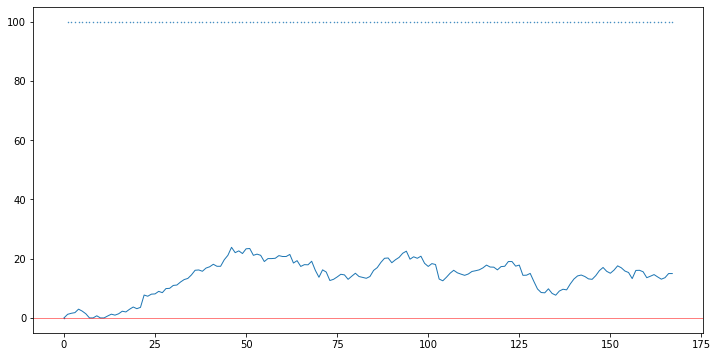

In [10]:
plt.figure(figsize=(12,6))
plt.plot(data.loc[:, 'netValue'], linewidth=1)
plt.scatter(range(len(data.shares)), data.shares*100, s=0.2)
plt.axhline(y=0, c='r', linewidth=0.5)
plt.show()

Creo una columna booleana dependiendo de si el estado contiene 'STOPLOSS'

In [11]:
data['stoploss'] = data.state.apply(lambda v: v.find('STOPLOSS') != -1)

AttributeError: 'float' object has no attribute 'find'

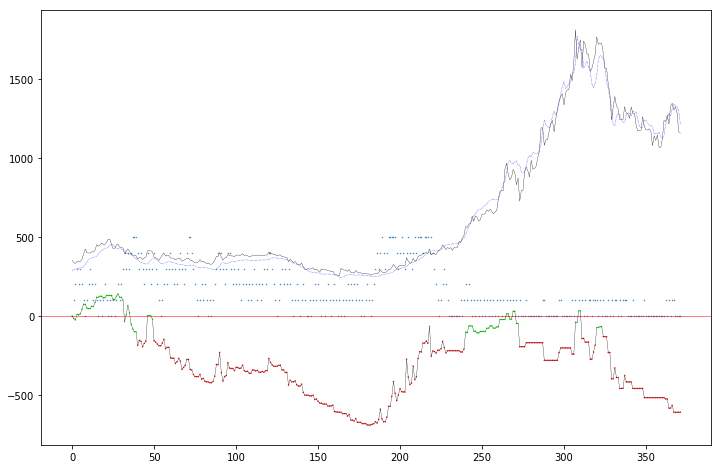

In [93]:
cmap = colors.ListedColormap(['#00ff00','#ff0000'])

plt.figure(figsize=(12,8))
plt.scatter(range(data.shape[0]), data.loc[:, 'net.Val'], 
            marker='.', c=data.stoploss, cmap=cmap, s=1)
plt.plot(data.loc[:, 'net.Val'], linewidth=0.3, c='k')
plt.plot(data.loc[:, 'price'], linewidth=0.3, c='k')
plt.plot(data.loc[:, 'forecast'], linewidth=0.5, c='blue', linestyle=':')
plt.scatter(range(len(data.shares)), data.shares*100, s=0.2)
plt.axhline(y=0, c='r', linewidth=0.5)
plt.show()

Now, without STOPLOSS Signal

In [13]:
raw_filepath = '../output/rl_model_forecast_acciona_2019.csv'
raw_data = pd.read_csv(raw_filepath, sep=',')
new_colnames = [col_name.strip() for col_name in raw_data.columns]
new_cols_dict = dict(zip(raw_data.columns, new_colnames))
data = raw_data.rename(columns=new_cols_dict)
data.head()

,t,price,forecast,budget,investment,value,netValue,shares,action,reward,state
0,0.0,81.88,82.26,100.00,0.00,0.00,0.00,0.0,buy,0.0,EVEN_GOUP_NOTHAVE_PUNKNW_PPUNKNW_PPPUNKNW
1,1.0,83.10,82.13,18.12,81.88,83.10,1.22,1.0,f.buy,-0.5,LOSE_DOWN_YESHAVE_PUNKNW_PPUNKNW_PPPUNKNW
2,2.0,83.44,84.24,18.12,81.88,83.44,1.56,1.0,f.buy,-0.5,LOSE_GOUP_YESHAVE_PWRONG_PPUNKNW_PPPUNKNW
3,3.0,83.66,82.80,18.12,81.88,83.66,1.78,1.0,f.buy,-0.5,LOSE_DOWN_YESHAVE_PVALID_PPWRONG_PPPUNKNW
4,4.0,84.84,83.20,18.12,81.88,84.84,2.96,1.0,f.buy,-0.5,LOSE_DOWN_YESHAVE_PWRONG_PPVALID_PPPVALID


Create a boolean column indicating what is the ACTION taken.

In [26]:
data.action.unique()

array(['buy', 'f.buy'], dtype=object)

In [28]:
def color_action(a):
    actions = ['buy','sell','f.buy','f.sell','n/a']
    return actions.index(a)

data['action_id'] = data.action.apply(lambda a: color_action(a))
data.head()

,t,price,forecast,budget,investment,value,netValue,shares,action,reward,state,action_id
0,0.0,81.88,82.26,100.00,0.00,0.00,0.00,0.0,buy,0.0,EVEN_GOUP_NOTHAVE_PUNKNW_PPUNKNW_PPPUNKNW,0
1,1.0,83.10,82.13,18.12,81.88,83.10,1.22,1.0,f.buy,-0.5,LOSE_DOWN_YESHAVE_PUNKNW_PPUNKNW_PPPUNKNW,2
2,2.0,83.44,84.24,18.12,81.88,83.44,1.56,1.0,f.buy,-0.5,LOSE_GOUP_YESHAVE_PWRONG_PPUNKNW_PPPUNKNW,2
3,3.0,83.66,82.80,18.12,81.88,83.66,1.78,1.0,f.buy,-0.5,LOSE_DOWN_YESHAVE_PVALID_PPWRONG_PPPUNKNW,2
4,4.0,84.84,83.20,18.12,81.88,84.84,2.96,1.0,f.buy,-0.5,LOSE_DOWN_YESHAVE_PWRONG_PPVALID_PPPVALID,2


In [42]:
color_action('f.buy')

2

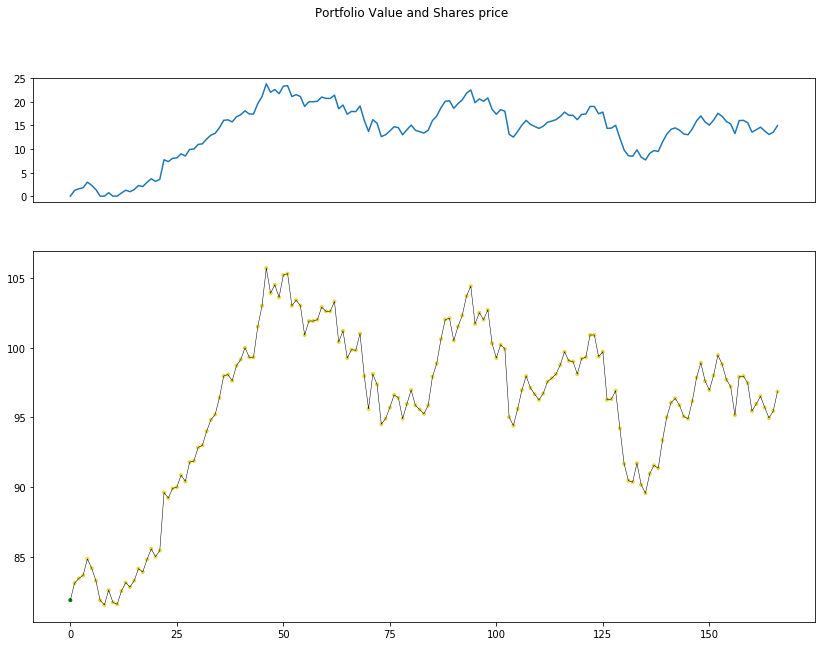

In [62]:
colors = {0: 'green', 1:'red', 2:'#E8D842', 3:'#BE5B11', 4:'#BBBBBB'}

fig, (ax1, ax2) = plt.subplots(2, sharex=True, 
                               figsize=(14,10), 
                               gridspec_kw={'height_ratios': [1, 3]})
fig.suptitle('Portfolio Value and Shares price')
ax1.plot(data.netValue)
ax1.xaxis.set_ticks_position('none')
# If you want to draw nr of shares, reuse following two lines.
# ax1b = ax1.twinx()
# data.shares.plot(kind='line', ax=ax1b)

ax2.scatter(range(len(data.price)), data.price, 
            c=data.action_id.apply(lambda x: colors[x]), 
            marker='.')
ax2.plot(data.price, c='black', linewidth=0.5)
plt.show()

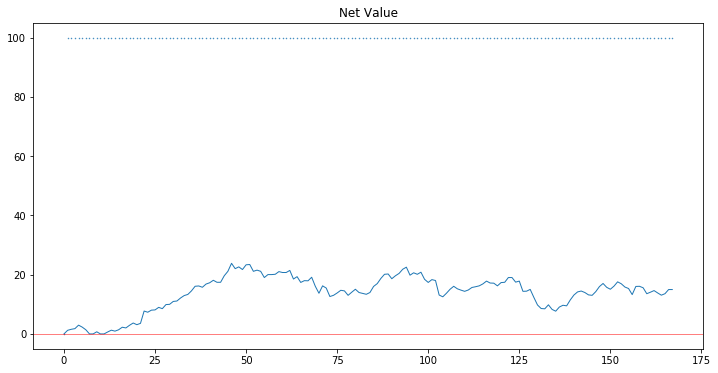

In [15]:
plt.figure(figsize=(12,6))
plt.plot(data.loc[:, 'netValue'], linewidth=1)
plt.title('Net Value')
plt.scatter(range(len(data.shares)), data.shares*100, s=0.2)
plt.axhline(y=0, c='r', linewidth=0.5)
plt.show()

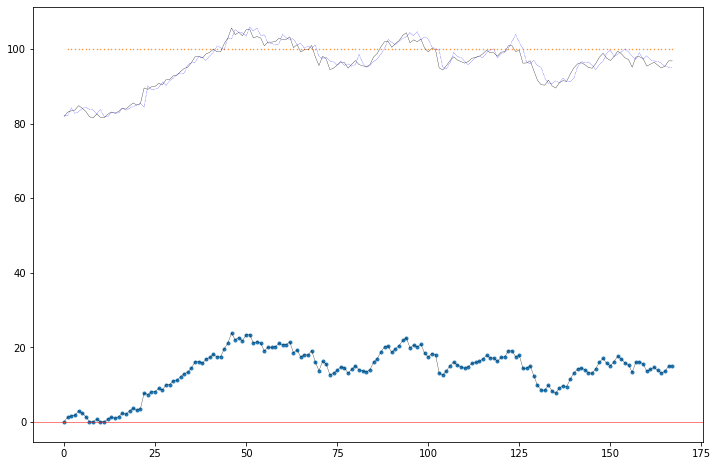

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(range(data.shape[0]), data.loc[:, 'netValue'], marker='.')
plt.plot(data.loc[:, 'netValue'], linewidth=0.3, c='k')
plt.plot(data.loc[:, 'price'], linewidth=0.3, c='k')
plt.plot(data.loc[:, 'forecast'], linewidth=0.5, c='blue', linestyle=':')
plt.scatter(range(len(data.shares)), data.shares*100, s=0.2)
plt.axhline(y=0, c='r', linewidth=0.5)
plt.show()